In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
feature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_label.csv')
Xtrain = feature.values
Ytrain = label.values
Ytrain.reshape((-1,1))

print(Xtrain.shape, Ytrain.shape)

tfeature = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_test_feature.csv')
tlabel = pd.read_csv('https://raw.githubusercontent.com/ajn313/NYU2023SummerML3/main/Day5/fish_market_test_label.csv')
Xtest = tfeature.values
Ytest = tlabel.values
Ytest.reshape((-1,1))

print(Xtest.shape, Ytest.shape)

(124, 5) (124, 1)
(30, 5) (30, 1)


In [ ]:
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=75, random_state=10, shuffle=True, stratify=None)

In [ ]:
# Hint:
# Do you need to split the dataset?
# How to prediction? Features?
# Polynomial? Order? Would it be overfitting?
# Loss function?
# Plot?

# Go over the past slides and labs!

199221.84751827107
192263.72316628834


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+05, tolerance: 5.156e+02
  model = cd_fast.enet_coordinate_descent(


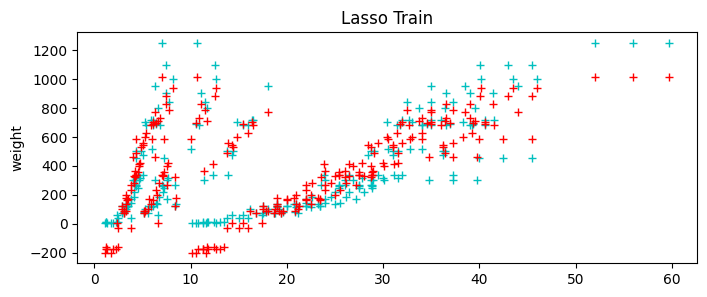

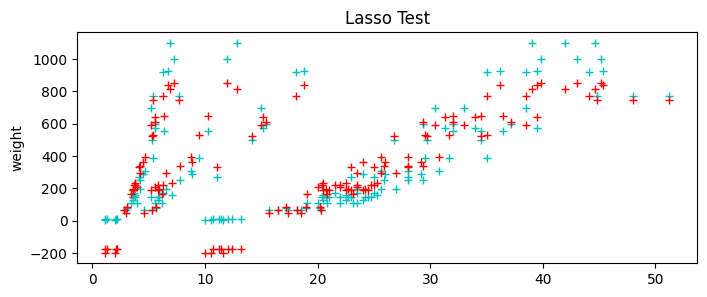

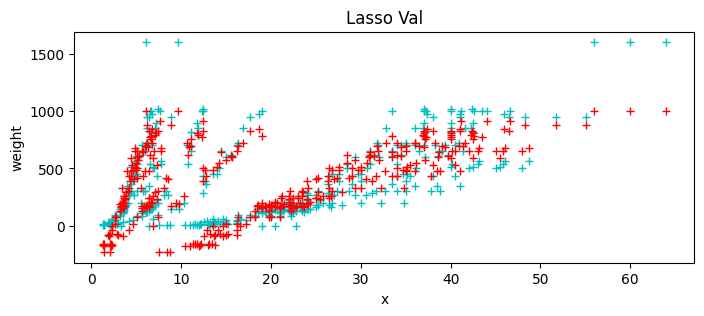

In [ ]:
sk = Lasso()

sk.fit(Xtrain, Ytrain)
yTrainPred = sk.predict(Xtrain)
yTestPred = sk.predict(Xtest)
YvalPred = sk.predict(Xval)


print(np.mean((Ytrain-yTrainPred)**2))
print(np.mean((Ytest-yTestPred)**2))

fig = plt.figure(figsize=(8, 3))
plt.title('Lasso Train')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')

fig2 = plt.figure(figsize=(8, 3))
plt.title('Lasso Test')
plt.ylabel('weight')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yTestPred, 'r+')

fig3 = plt.figure(figsize=(8,3))
plt.title('Lasso Val')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, YvalPred, 'r+')

10586.451915356942
11383.019863619598


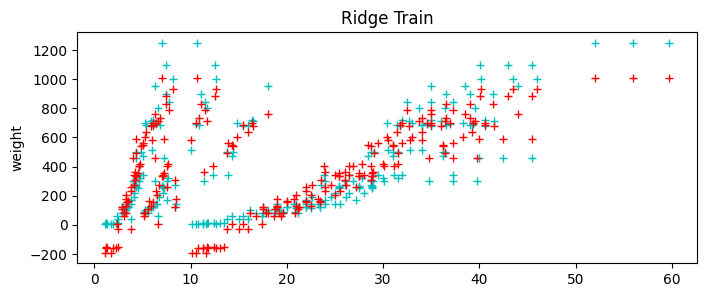

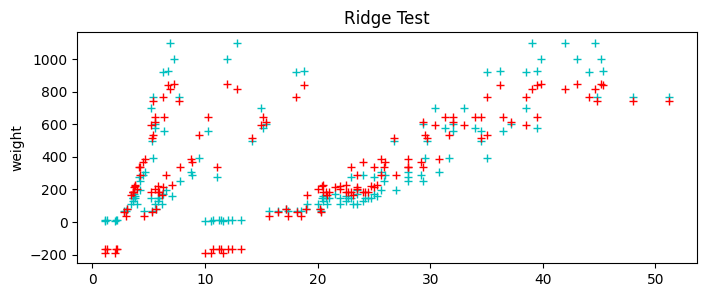

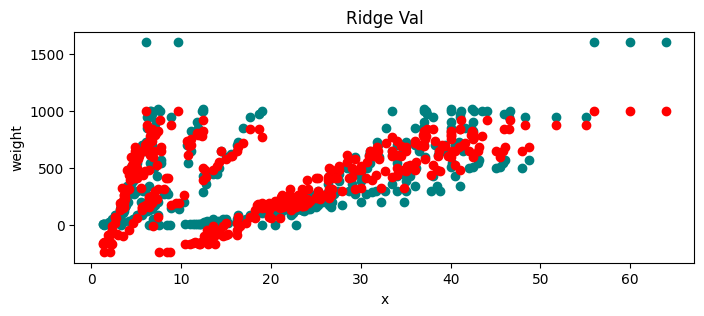

In [ ]:

sk = Ridge()

sk.fit(Xtrain, Ytrain)
yTrainPred = sk.predict(Xtrain)
yTestPred = sk.predict(Xtest)
YvalPred = sk.predict(Xval)

print(np.mean((Ytrain-yTrainPred)**2))
print(np.mean((Ytest-yTestPred)**2))

fig = plt.figure(figsize=(8, 3))
plt.title('Ridge Train')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')

fig2 = plt.figure(figsize=(8, 3))
plt.title('Ridge Test')
plt.ylabel('weight')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yTestPred, 'r+')

fig3 = plt.figure(figsize=(8,3))
plt.title('Ridge Val')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, YvalPred, 'r+')




In [ ]:
Xprime = np.hstack([np.ones((len(Xtrain),1)), Xtrain])
y = Ytrain.reshape(-1, 1)
w = np.linalg.pinv(Xprime.T@Xprime)@Xprime.T@Ytrain
yHat = Xprime@w
print(np.mean((Ytrain-yHat)**2))

fig = plt.figure(figsize=(8, 3))
plt.title('Penrose Train')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yHat, 'r+')


Xprime = np.hstack([np.ones((len(Xtest),1)), Xtest])
y = Ytrain.reshape(-1, 1)
w = np.linalg.pinv(Xprime.T@Xprime)@Xprime.T@Ytest
print(w)
yHat = Xprime@w
print(np.mean(np.sqrt((Ytest-yHat)**2)))

f = plt.figure(figsize=(8, 3))
plt.title('Penrose Test')
plt.ylabel('weight')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')

SyntaxError: ignored

(49, 1)
MSE Train:  80.75067652356134
MSE Test:  86.92491545181059
MSE Val:  95.83233896042657


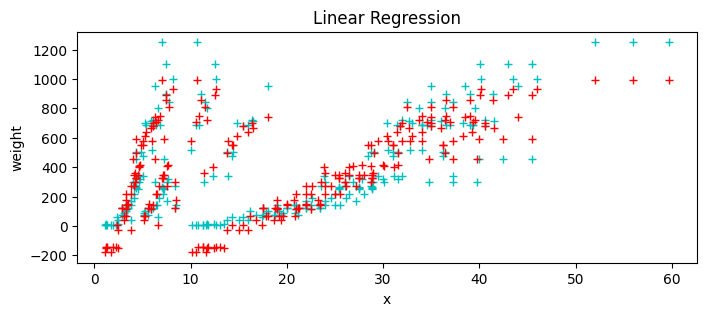

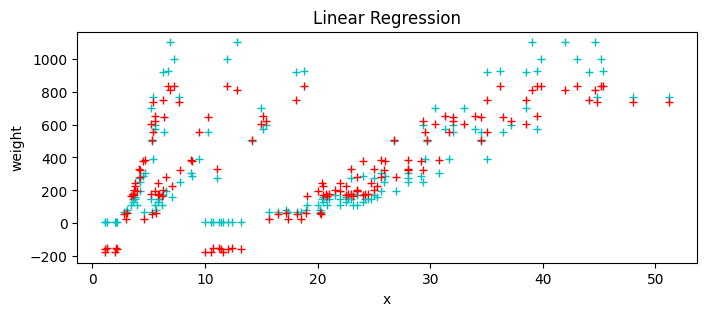

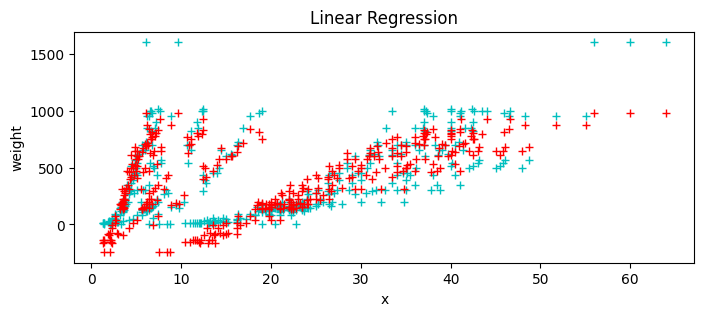

In [ ]:
# linear regression model and MSE:
feat=label.columns.to_list()

X = label[feat].values
regr = LinearRegression(fit_intercept=True)
regr.fit(Xtrain,Ytrain)

yTrainPred = regr.predict(Xtrain)  # Model prediction
print(yTrainPred.shape)

yTestPred = regr.predict(Xtest)
yValPred = regr.predict(Xval)

#MSE
mse_yTrain = np.mean(np.sqrt((Ytrain-yTrainPred)**2))
mse_yTest = np.mean(np.sqrt((Ytest-yTestPred)**2))
mse_yVal = np.mean(np.sqrt((Yval-yValPred)**2))
print("MSE Train: ", mse_yTrain)
print("MSE Test: ",mse_yTest)
print("MSE Val: ",mse_yVal)

fig1 = plt.figure(figsize=(8,3))
plt.title('Linear Regression')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xtrain, Ytrain, 'c+')
plt.plot(Xtrain, yTrainPred, 'r+')

fig2 = plt.figure(figsize=(8,3))
plt.title('Linear Regression')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xtest, Ytest, 'c+')
plt.plot(Xtest, yTestPred, 'r+')

fig3 = plt.figure(figsize=(8,3))
plt.title('Linear Regression')
plt.ylabel('weight')
plt.xlabel('x')
plt.plot(Xval, Yval, 'c+')
plt.plot(Xval, yValPred, 'r+')
